<h1 style='color: green; font-size: 36px; font-weight: bold;'>Sample tests</h1>

## <font color='red' style='font-size: 30px;'>1.2 Effect of a sample size</font>
<hr style='border: 2px solid red;'>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('../data/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
note_average_per_movie = ratings.groupby('movieId').mean()['rating']
note_average_per_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [5]:
number_votes_per_movie = ratings.groupby('movieId').count()
number_votes_per_movie.head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [6]:
movies_with_more_than_9_votes = number_votes_per_movie.query('rating >= 10').index
movies_with_more_than_9_votes.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

## MovieLens -  Average of each movie with at least 10 votes

In [9]:
note_average_movies_with_more_than_9_votes = note_average_per_movie.loc[movies_with_more_than_9_votes.values]
note_average_movies_with_more_than_9_votes

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

## Movies average with at least 10 votes

In [10]:
note_average_movies_with_more_than_9_votes.mean()

3.4320503405352603

### <font color='blue' style='font-size: 30px;'>Visualizing the change of average over time</font>

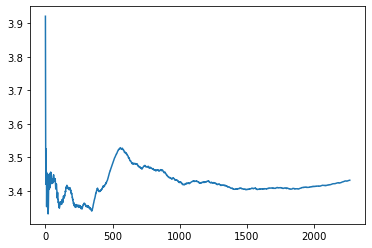

In [27]:
size = len(note_average_movies_with_more_than_9_votes)
medias = [note_average_movies_with_more_than_9_votes[0: i].mean() for i in range(1, size)]

plt.plot(medias)

### With a sample

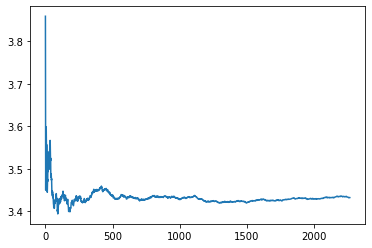

In [24]:
temp = note_average_movies_with_more_than_9_votes.sample(frac = 1, random_state = 75243)

medias = [temp[0: i].mean() for i in range(1, len(temp))]
    
plt.plot(medias)

>As the sample grows, the media are stabilized.

## <font color='red' style='font-size: 30px;'>1.3 Confidence interval</font>
<hr style='border: 2px solid red;'>

## Difference between Z-test and T-test

[Here is the difference](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/)

> <b>Z-test</b> is used in sample with more than 30 and when the population sample is known.

> <b>T-test</b> is used in sample with less than 30 and when the population sample is not known.

<p>Howeven the two tests for sample more than 30 are appeared</p>

### <font color='blue' style='font-size: 30px;'>Z-test</font>

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.
# $$e = z \frac{\sigma}{\sqrt{n}}$$

### Intervalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

In [56]:
# media = sample_media +- z * e

## Using Scipy

[method norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [57]:
from scipy.stats import norm

z = norm.ppf(0.975)
n = note_average_movies_with_more_than_9_votes.shape[0]
sigma = note_average_movies_with_more_than_9_votes.std() / np.math.sqrt(n)

e = z * sigma
e

0.020804392788303542

In [58]:
mean = note_average_movies_with_more_than_9_votes.mean()
interval = (mean - e, mean + e)
interval

(3.4112459477469566, 3.452854733323564)

## Using Statsmodel

[method zconfint](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.zconfint.html)

In [59]:
from statsmodels.stats.weightstats import zconfint

zconfint(note_average_movies_with_more_than_9_votes)

(3.4112459477469557, 3.452854733323563)

### <font color='blue' style='font-size: 30px;'>T-test</font>

[method DescrStatsW](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html)

In [63]:
from statsmodels.stats.weightstats import DescrStatsW

d1 = DescrStatsW(note_average_movies_with_more_than_9_votes)
d1.tconfint_mean()

(3.411234839229379, 3.4528658418411378)